## Second

### Student Information
Name:黃麟凱

Student ID:109062607

GitHub ID:vbblackapple

---

## 2. Data Preparation

In [1]:
import random
files = ["amazon_cells_labelled.txt", "imdb_labelled.txt", "yelp_labelled.txt"]
categories_name = ["amazon","imdb","yelp"]
data = []
for i in range(3):
    with open("sentiment labelled sentences/"+files[i]) as the_file:
        while True:
            line = the_file.readline()
            if not line: break
            line = line.strip("\n")
            label = int(line[-1])
            text = line.rstrip("\t 0").rstrip("\t 1")
            data.append([text,categories_name[i],label])
random.shuffle(data)

In [2]:
len(data)

3000

#### We can also print an example from the subset

In [3]:
# An example of what the subset contains
print("text:",data[0][0],"\ncategory_name:",data[0][1],"\nlabel:",data[0][2])

text: Instead, we got a bore fest about a whiny, spoiled brat babysitting. 
category_name: imdb 
label: 0


---

### ** >>> Exercise 1 (5 min): **  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [4]:
# Answer here
for i in range(0,3):
    print("text:",data[i][0],"\ncategory_name:",data[i][1],"\nlabel:",data[i][2])
    print ()

text: Instead, we got a bore fest about a whiny, spoiled brat babysitting. 
category_name: imdb 
label: 0

text: ) What makes this story different are the terrific production values - faultless photography, composition and editing - the terrific casting - the underappreciated Brian Keith playing a bully Teddy - and vivid history. 
category_name: imdb 
label: 1

text: The company shipped my product very promptly and it works well. 
category_name: amazon 
label: 1



---

## 3. Data Transformation

---

### 3.1 Converting Dictionary into Pandas Dataframe

In [5]:
import pandas as pd
import numpy as np

# construct dataframe from a list
X = pd.DataFrame(np.array(data), columns= ["text","category_name","label"])

In [6]:
len(X)

3000

In [7]:
X[0:2]

,text,category_name,label
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0
1,) What makes this story different are the terr...,imdb,1


In [8]:
for t in X["text"][:3]:
    print(t)

Instead, we got a bore fest about a whiny, spoiled brat babysitting.
) What makes this story different are the terrific production values - faultless photography, composition and editing - the terrific casting - the underappreciated Brian Keith playing a bully Teddy - and vivid history.
The company shipped my product very promptly and it works well.


### Adding Columns

In [9]:
# add category label also
X['category'] = X.category_name.apply(lambda t: categories_name.index(t))

Now we can print and see what our table looks like. 

In [10]:
X[0:10]

,text,category_name,label,category
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1
1,) What makes this story different are the terr...,imdb,1,1
2,The company shipped my product very promptly a...,amazon,1,0
3,This wonderful experience made this place a mu...,yelp,1,2
4,We won't be going back anytime soon!,yelp,0,2
5,"The ending is so, SO perfect... you'll shed a ...",imdb,1,1
6,The Buffet at Bellagio was far from what I ant...,yelp,0,2
7,Try them in the airport to experience some tas...,yelp,1,2
8,"All in all, I'm quite satisfied with this purc...",amazon,1,0
9,Utter crap.. Sound quality is TERRIBLE.,amazon,0,0


---

### 3.2 Familiarizing yourself with the Data

In [11]:
# a simple query
X[0:10][["text", "category_name"]]

,text,category_name
0,"Instead, we got a bore fest about a whiny, spo...",imdb
1,) What makes this story different are the terr...,imdb
2,The company shipped my product very promptly a...,amazon
3,This wonderful experience made this place a mu...,yelp
4,We won't be going back anytime soon!,yelp
5,"The ending is so, SO perfect... you'll shed a ...",imdb
6,The Buffet at Bellagio was far from what I ant...,yelp
7,Try them in the airport to experience some tas...,yelp
8,"All in all, I'm quite satisfied with this purc...",amazon
9,Utter crap.. Sound quality is TERRIBLE.,amazon


#### Let's query the last 10 records

In [12]:
X[-10:]

,text,category_name,label,category
2990,did not like at all.,yelp,0,2
2991,This movie is excellent!Angel is beautiful and...,imdb,1,1
2992,An Awesome New Look For Fall 2000!.,amazon,1,0
2993,The phone crashed completely and now I have to...,amazon,0,0
2994,"I love the owner/chef, his one authentic Japan...",yelp,1,2
2995,"OMG, the food was delicioso!",yelp,1,2
2996,The lighting is awful.,imdb,0,1
2997,"Third, the cheese on my friend's burger was cold.",yelp,0,2
2998,Oh and I forgot to also mention the weird colo...,amazon,0,0
2999,Vivian Schilling did an excellent job with the...,imdb,1,1


In [13]:
# using loc (by position)
X.iloc[::10, 0:2][0:10]

,text,category_name
0,"Instead, we got a bore fest about a whiny, spo...",imdb
10,I have purchased these for both family and fri...,amazon
20,So I had to take the battery out of the phone ...,amazon
30,is pretty funny.,imdb
40,"This place is a jewel in Las Vegas, and exactl...",yelp
50,"First off the reception sucks, I have never ha...",amazon
60,"horrible, had to switch 3 times.",amazon
70,"Terrible product, and waste of money!",amazon
80,I don't like this Nokia either.,amazon
90,"Conceptually, the show offers a little bit of ...",imdb


In [14]:
X.loc[::10, 'text'][0:10]

0     Instead, we got a bore fest about a whiny, spo...
10    I have purchased these for both family and fri...
20    So I had to take the battery out of the phone ...
30                                     is pretty funny.
40    This place is a jewel in Las Vegas, and exactl...
50    First off the reception sucks, I have never ha...
60                     horrible, had to switch 3 times.
70                Terrible product, and waste of money!
80                      I don't like this Nokia either.
90    Conceptually, the show offers a little bit of ...
Name: text, dtype: object

In [15]:
# standard query (Cannot simultaneously select rows and columns)
X[::10][0:10]

,text,category_name,label,category
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1
10,I have purchased these for both family and fri...,amazon,1,0
20,So I had to take the battery out of the phone ...,amazon,0,0
30,is pretty funny.,imdb,1,1
40,"This place is a jewel in Las Vegas, and exactl...",yelp,1,2
50,"First off the reception sucks, I have never ha...",amazon,0,0
60,"horrible, had to switch 3 times.",amazon,0,0
70,"Terrible product, and waste of money!",amazon,0,0
80,I don't like this Nokia either.,amazon,0,0
90,"Conceptually, the show offers a little bit of ...",imdb,1,1


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [16]:
X.loc[[1107,22,201],["category"]]

,category
1107,0
22,2
201,0


---

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```imdb``` category, and query every 10th record. Only show the first 5 records.

In [17]:
# Answer here
X.loc[X["category_name"]=="imdb"][::10][:10]

,text,category_name,label,category
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1
48,The movie showed a lot of Florida at it's best...,imdb,1,1
84,Go watch it!,imdb,1,1
101,It's PURE BRILLIANCE.,imdb,1,1
123,I'd advise anyone to go and see it.,imdb,1,1
152,This movie is so awesome!,imdb,1,1
177,"I think it was Robert Ryans best film, because...",imdb,1,1
206,Lucy Bell is so much higher than this crap and...,imdb,0,1
229,"Garbo, who showed right off the bat that her t...",imdb,1,1
284,It was so funny.,imdb,1,1


---

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [18]:
X.isnull()

,text,category_name,label,category
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2995,False,False,False,False
2996,False,False,False,False
2997,False,False,False,False
2998,False,False,False,False


In [19]:
import helpers.data_mining_helpers as dmh  
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
label            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
dtype: object

---

### >>> **Exercise 4 (5 min):** 

In [20]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

---

In [21]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [22]:
dummy_series

text        dummy_record
category               1
dtype: object

In [23]:
result_with_series = X.append(dummy_series, ignore_index=True)

In [24]:
# check if the records was commited into result
len(result_with_series)

3001

In [25]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
label            (The amoung of missing records is: , 1)
category         (The amoung of missing records is: , 0)
dtype: object

append again and remove the rows have null attribute

In [26]:
# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [27]:
X = X.append(dummy_dict, ignore_index=True)

In [28]:
len(X)

3001

In [29]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
label            (The amoung of missing records is: , 1)
category         (The amoung of missing records is: , 0)
dtype: object

So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [30]:
X.dropna(inplace=True)

... and now let us test to see if we gotten rid of the records with missing values. 

In [31]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

text             (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
label            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
dtype: object

In [32]:
len(X)

3000

---

### >>> **Exercise 5 (take home)** 
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [33]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [34]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer here:
Type None or np.nan are real missing data, but word 'None' and word 'nan' aren't missing word.

---

### 4.2 Dealing with Duplicate Data

First, let us check how many duplicates we have in our current dataset. Here is the line of code that checks for duplicates; it is very similar to the `isnull` function that we used to check for missing values. 

In [35]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [36]:
X[X.duplicated('text')]

,text,category_name,label,category
741,The food was terrible.,yelp,0,2
1009,Definitely worth checking out.,imdb,1,1
1353,Works great!.,amazon,1,0
1495,Great Phone.,amazon,1,0
1726,If you like a loud buzzing to override all you...,amazon,0,0
1749,Excellent product for the price.,amazon,1,0
1755,Does not fit.,amazon,0,0
1890,Great phone.,amazon,1,0
2062,I won't be back.,yelp,0,2
2091,I love this place.,yelp,1,2


In [37]:
sum(X.duplicated())

17

In [38]:
sum(X.duplicated('text'))

18

Now let us create some duplicated dummy records and append it to the main dataframe `X`. Subsequenlty, let us try to get rid of the duplicates.

In [39]:
dummy_duplicate_dict = [{
                             'text': 'dummy recor',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy recor',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy recor',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [40]:
try_duplicate_X = X.append(dummy_duplicate_dict, ignore_index=True)

In [41]:
len(try_duplicate_X)

3003

In [42]:
sum(try_duplicate_X.duplicated('text'))

20

remove duplicated rows

In [43]:
try_duplicate_X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [44]:
len(try_duplicate_X)

2966

---

## 5.  Data Preprocessing

---

### 5.1 Sampling

In [45]:
X_sample = X.sample(n=1000) #random state

In [46]:
len(X_sample)

1000

In [47]:
X_sample[0:4]

,text,category_name,label,category
2416,I saw this short film on HBO the other day and...,imdb,1,1
897,The turkey and roast beef were bland.,yelp,0,2
2900,Worked perfectly!,amazon,1,0
1040,This case seems well made.,amazon,1,0


---

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

Answer here:
There's no change of X

---

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
categories_name

['amazon', 'imdb', 'yelp']

imdb      1000
yelp      1000
amazon    1000
Name: category_name, dtype: int64


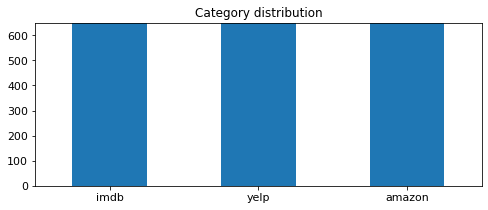

In [50]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      347
yelp      333
amazon    320
Name: category_name, dtype: int64


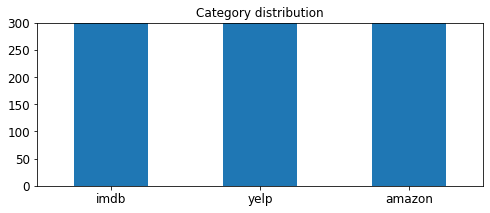

In [51]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

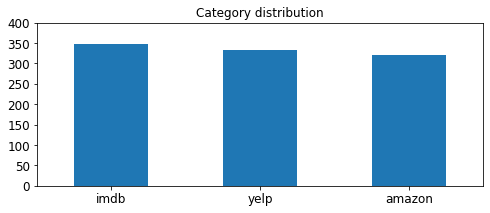

In [52]:
# Answer here

# plot barchart for X_sample
up_limit = int(max(X_sample.category_name.value_counts())/100)*100+100

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, up_limit], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

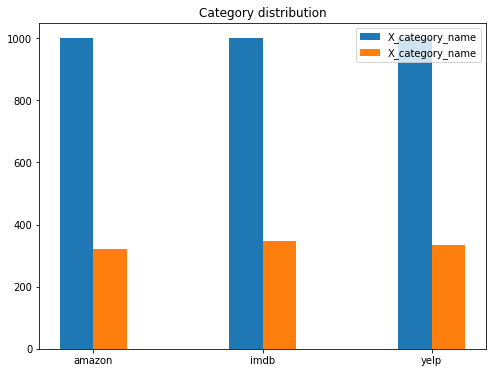

In [53]:
# Answer here
# plot barchart for X_sample
bar_width = 0.2
index = np.arange(3)


def produce_tuple(original_one,categories):
    result = ()
    for c in categories_name:
        result += (original_one[c],)
    return result
X_tuple = produce_tuple(X.category_name.value_counts(),categories_name)
X_sample_tuple = produce_tuple(X_sample.category_name.value_counts(),categories_name)

fig = plt.figure(figsize = (8,6))
A = plt.bar(index-bar_width/2,
           X_tuple,
           bar_width,
           label='X_category_name')
B = plt.bar(index+bar_width/2,
            X_sample_tuple,
            bar_width,
            label='X_category_name')
plt.xticks(index, categories_name)
plt.title("Category distribution")
temp = plt.legend(loc='upper right')

---

### 5.2 Feature Creation

In [54]:
import nltk

In [55]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [56]:
X[0:4]["unigrams"]

0    [Instead, ,, we, got, a, bore, fest, about, a,...
1    [), What, makes, this, story, different, are, ...
2    [The, company, shipped, my, product, very, pro...
3    [This, wonderful, experience, made, this, plac...
Name: unigrams, dtype: object

In [57]:
X[0:4]

,text,category_name,label,category,unigrams
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1,"[Instead, ,, we, got, a, bore, fest, about, a,..."
1,) What makes this story different are the terr...,imdb,1,1,"[), What, makes, this, story, different, are, ..."
2,The company shipped my product very promptly a...,amazon,1,0,"[The, company, shipped, my, product, very, pro..."
3,This wonderful experience made this place a mu...,yelp,1,2,"[This, wonderful, experience, made, this, plac..."


In [58]:
list(X[0:1]['unigrams'])

[['Instead',
  ',',
  'we',
  'got',
  'a',
  'bore',
  'fest',
  'about',
  'a',
  'whiny',
  ',',
  'spoiled',
  'brat',
  'babysitting',
  '.']]

---

### 5.3 Feature subset selection

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [60]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

---

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [61]:
# Answer here
" ".join(list(X[:1].text))

'Instead, we got a bore fest about a whiny, spoiled brat babysitting.'

---

In [62]:
# We can check the shape of this matrix by:
X_counts.shape


(3000, 5155)

In [63]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [64]:
X[0:5]

,text,category_name,label,category,unigrams
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1,"[Instead, ,, we, got, a, bore, fest, about, a,..."
1,) What makes this story different are the terr...,imdb,1,1,"[), What, makes, this, story, different, are, ..."
2,The company shipped my product very promptly a...,amazon,1,0,"[The, company, shipped, my, product, very, pro..."
3,This wonderful experience made this place a mu...,yelp,1,2,"[This, wonderful, experience, made, this, plac..."
4,We won't be going back anytime soon!,yelp,0,2,"[We, wo, n't, be, going, back, anytime, soon, !]"


In [65]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [66]:
# Answer here
X_counts_arr = X_counts[0:100, 0:100].toarray()
print (count_vect.get_feature_names()[np.transpose(np.nonzero(X_counts_arr))[1][1]])

absolutely


---

In [67]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Now let us put a `00` in the document to see if it is detected as we expect. 

In [68]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

Visualization

In [69]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [70]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [71]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [72]:
plot_z = X_counts[0:20, 0:20].toarray()

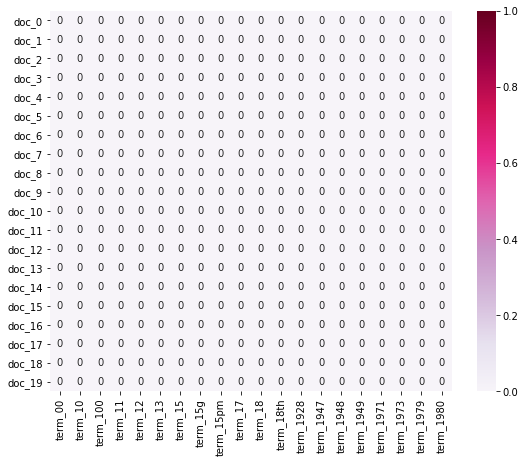

In [73]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

Answer here:
just show the words that apeear more than a threshold (the number of words is calculated by summing numbers of all documents.) 

---

### 5.4 Dimensionality Reduction

In [74]:
from sklearn.decomposition import PCA

In [75]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [76]:
X_reduced.shape

(3000, 2)

In [77]:
categories_name

['amazon', 'imdb', 'yelp']

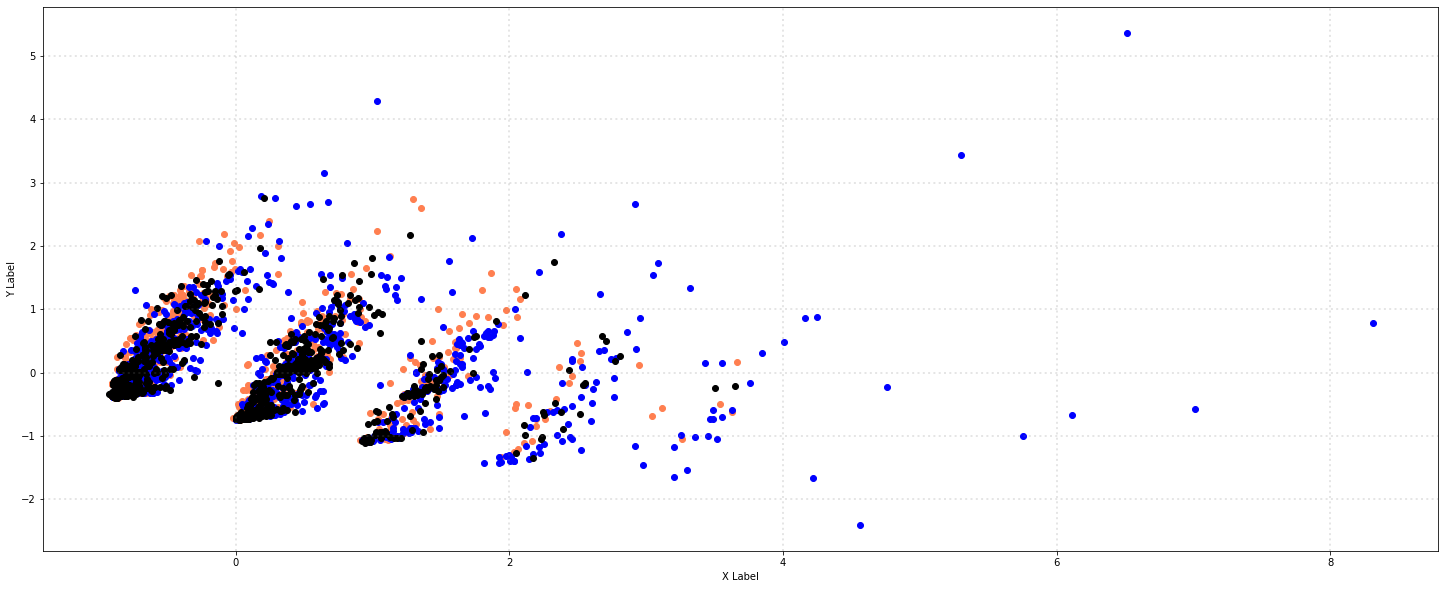

In [78]:
#classified by category
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories_name):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

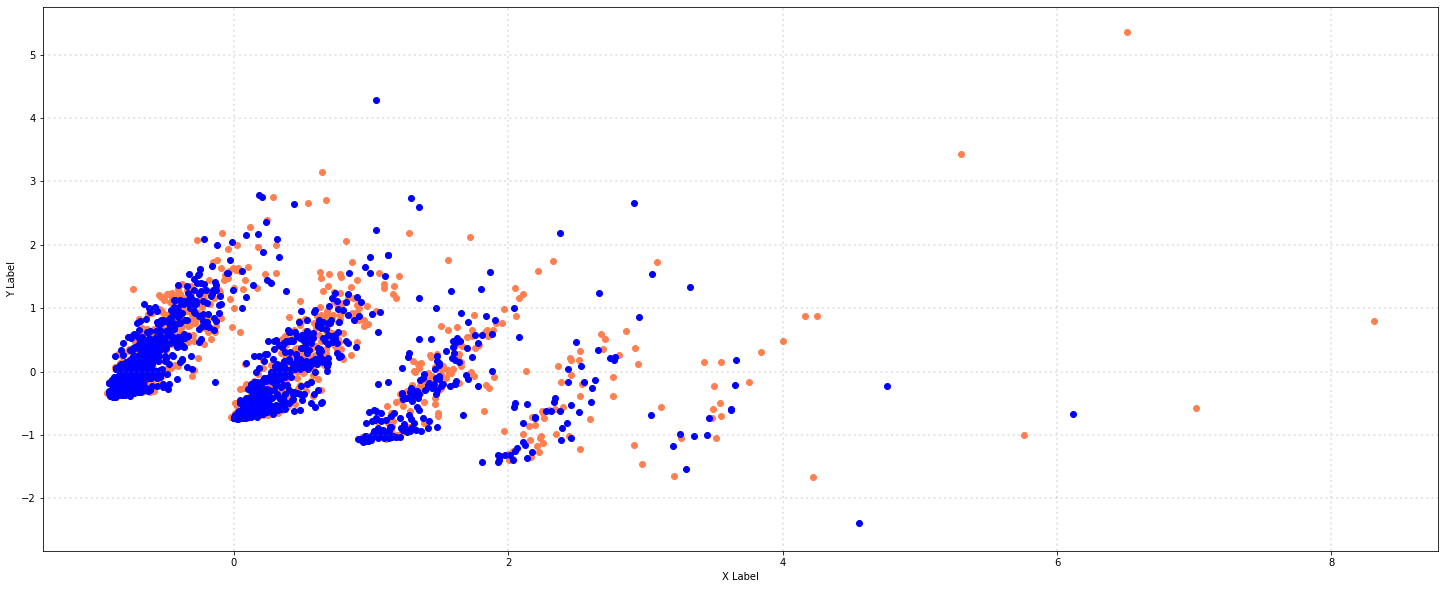

In [79]:
#classified by category
col = ['coral', 'blue']
labels = ['1','0']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, labels):
    xs = X_reduced[X['label'] == label].T[0]
    ys = X_reduced[X['label'] == label].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

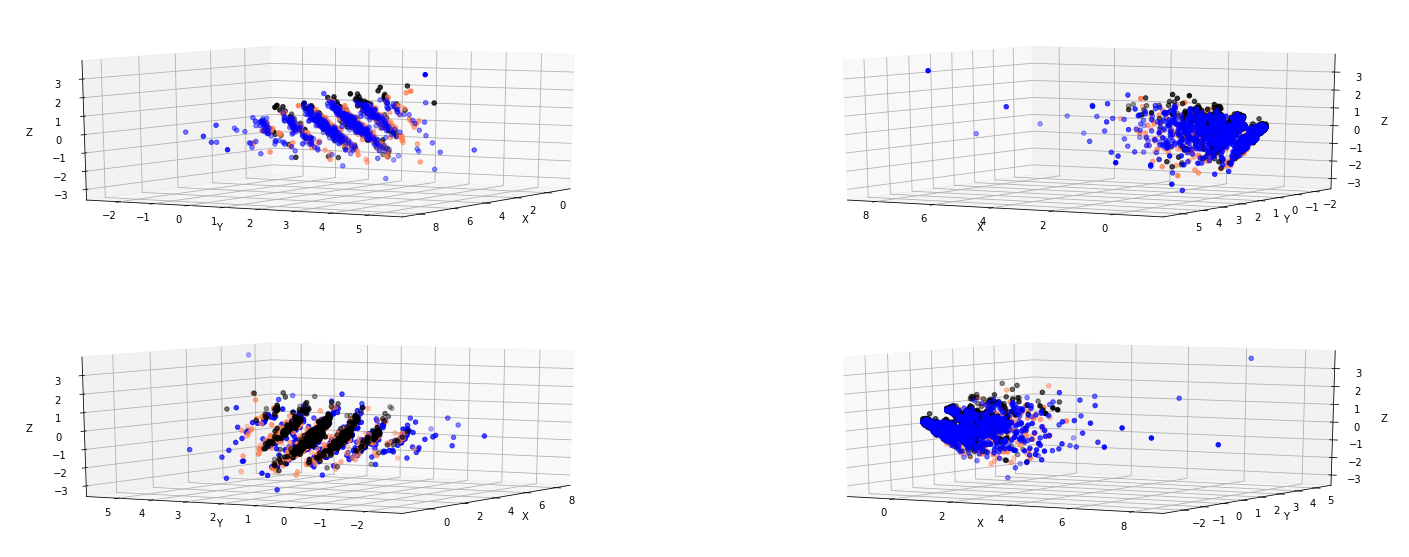

In [80]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black']
base_angle = 30

fig = plt.figure(figsize = (25,10))

def plot_small_pic(fig,which):
    ax = fig.add_subplot(int("22"+str(which)), projection='3d')
    for c, category in zip(col, categories_name):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]   
        ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=10., azim=(which-1)*90+base_angle)
    
for i in range(1,5):
    plot_small_pic(fig,i)

plt.show()

---

### 5.5 Atrribute Transformation / Aggregation

In [81]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [82]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [83]:
term_frequencies[0]

1

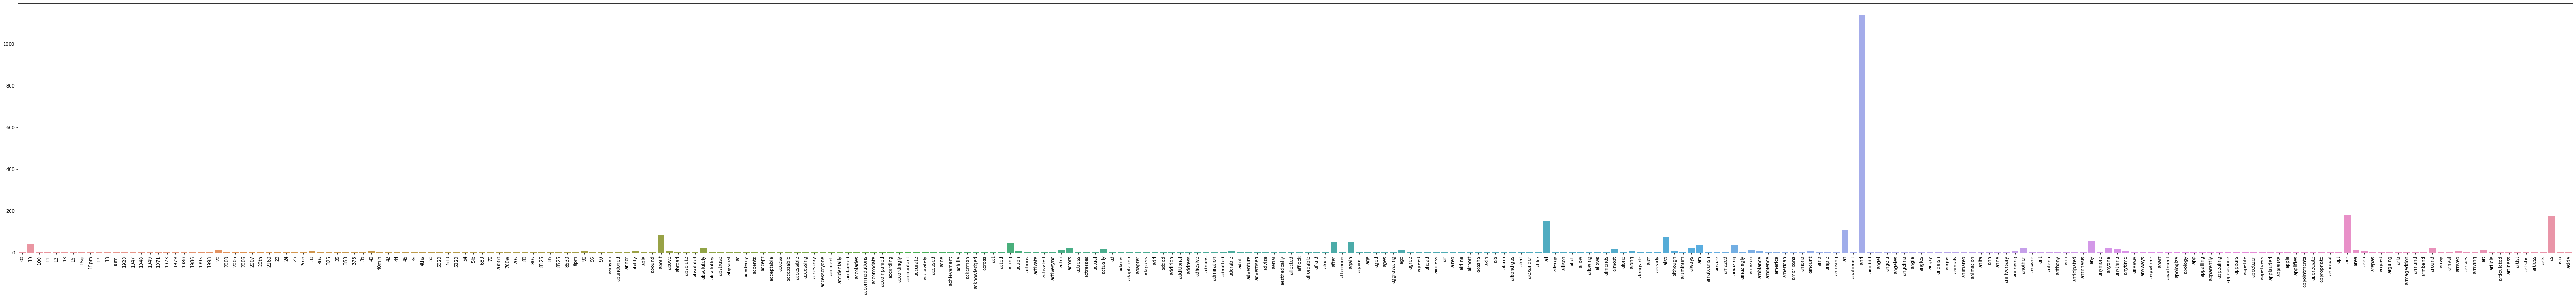

In [84]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

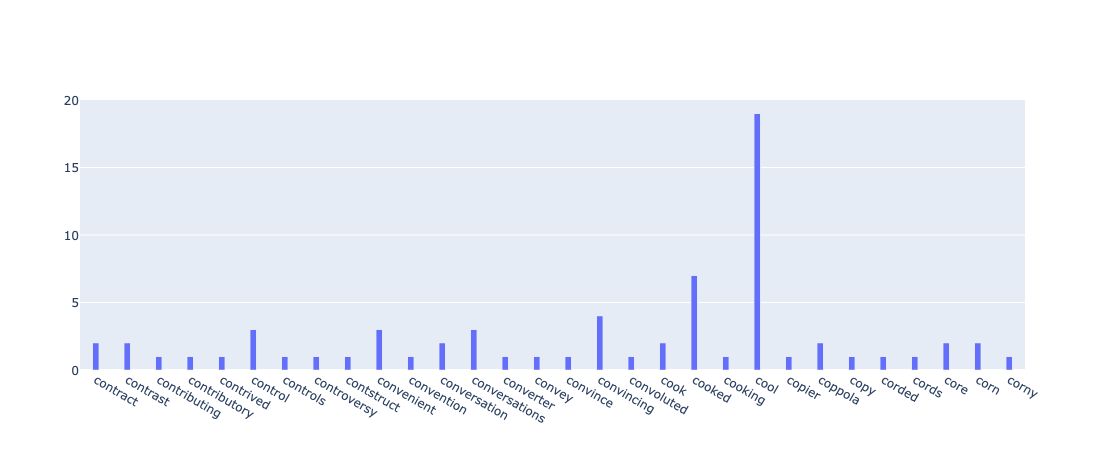

In [102]:
# Answer here
import plotly.graph_objs as go
terms =  list(count_vect.get_feature_names()[1000:1030])
times = list(term_frequencies[1000:1030])
width_list = [0.2 for i in range(300)]

data = [go.Bar(
               x = terms,
               y = times,
               width=width_list)]
fig = go.Figure(data=data)
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

ignore the terms whose times are lower than a threshold

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

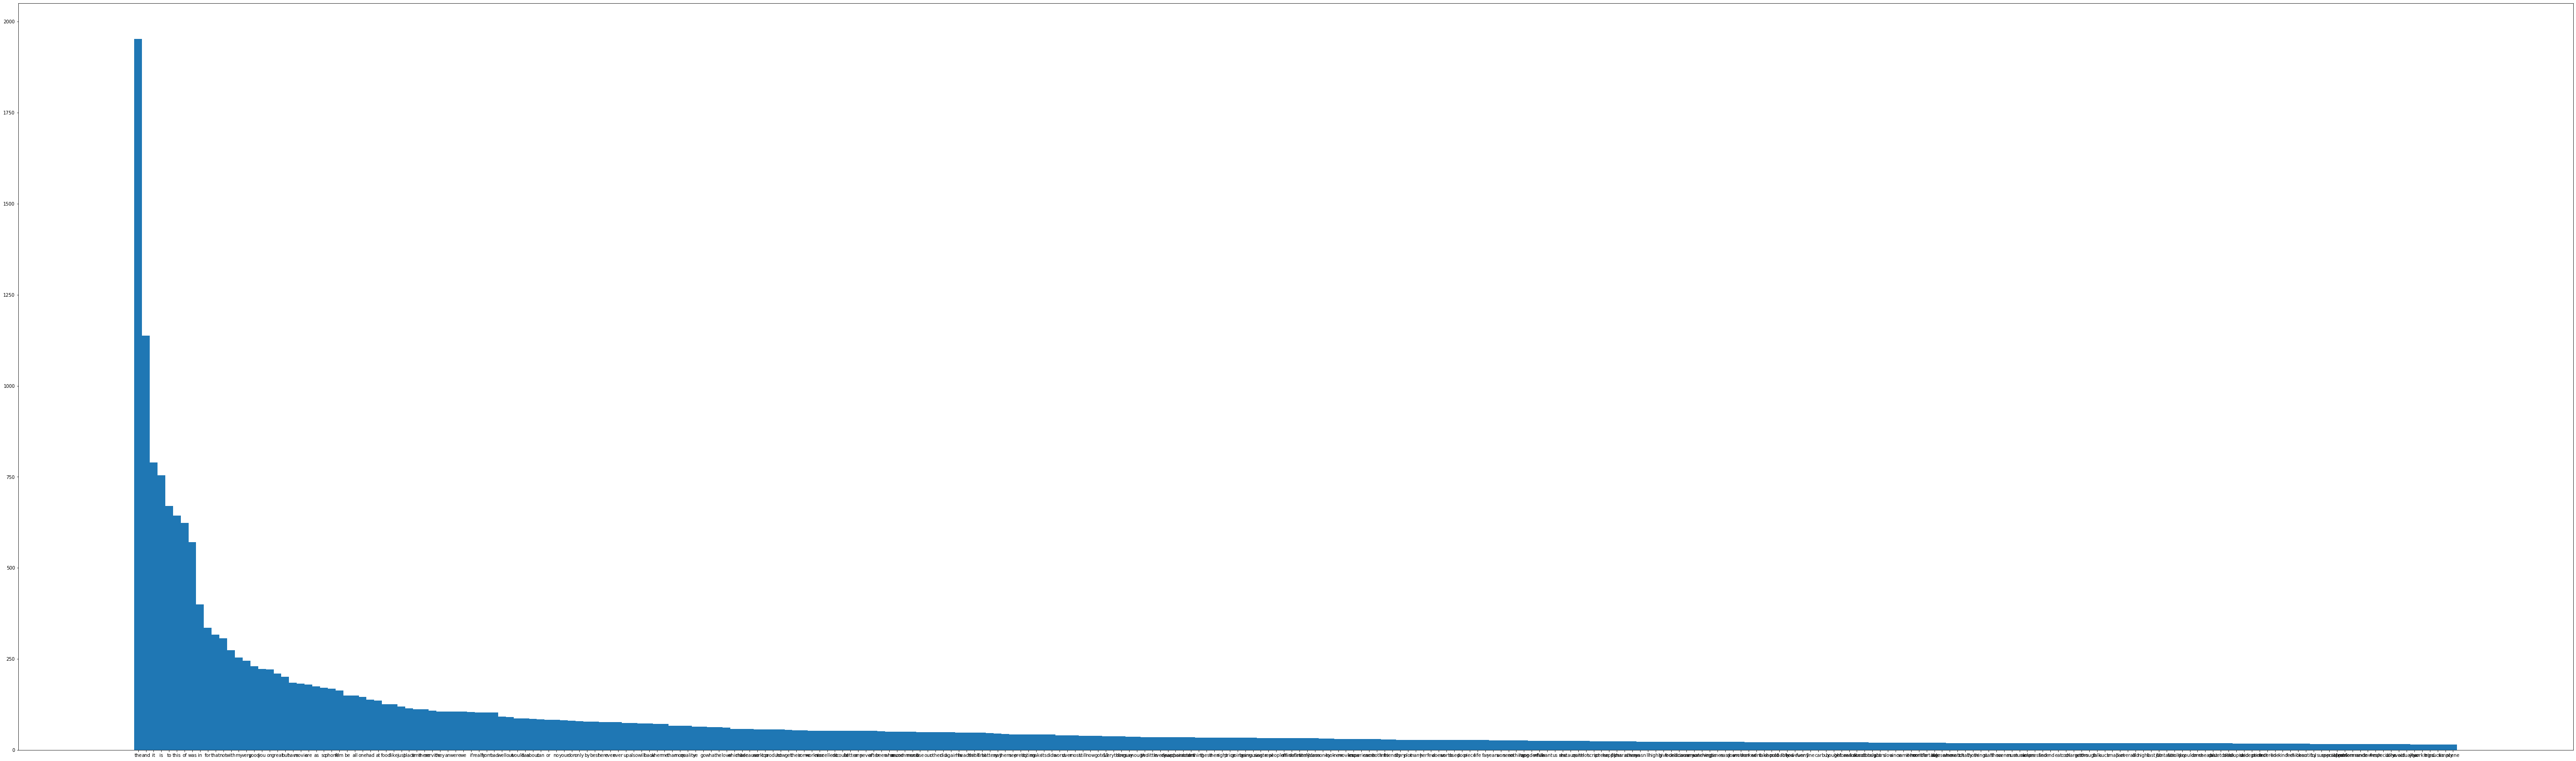

In [86]:
# Answer here
bar_width = 0.1
index = np.arange(4)

sorted_two =  [(x,y) for y,x in sorted(zip(list(term_frequencies),list(count_vect.get_feature_names())),reverse=True) ]
sorted_terms = tuple([x for x,_ in sorted_two[:300]])
sorted_times = tuple([y for _,y in sorted_two[:300]])
index = np.array([x*bar_width for x in range(len(term_frequencies[:300])) ])

fig = plt.figure(figsize = (100,30))
A = plt.bar(index,
           sorted_times,
           bar_width)

temp = plt.xticks(index, sorted_terms)

---

In [87]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

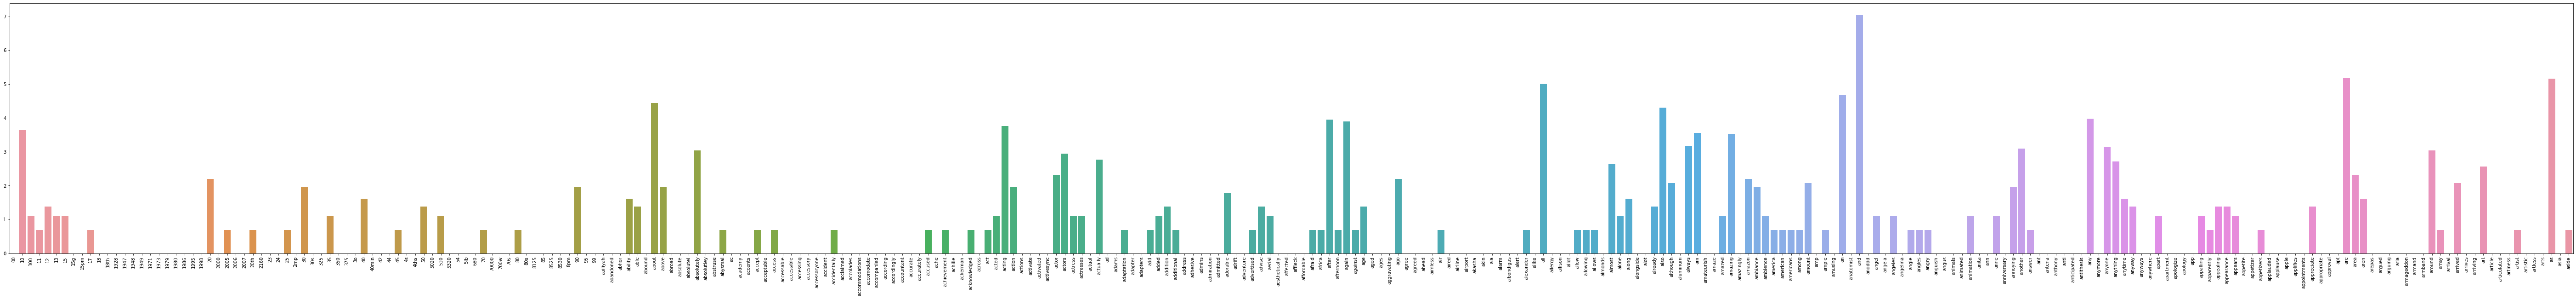

In [88]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### 5.6 Discretization and Binarization

In [89]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [90]:
mlb = preprocessing.LabelBinarizer()

In [91]:
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [92]:
mlb.classes_

array([0, 1, 2])

In [93]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [94]:
X[0:9]

,text,category_name,label,category,unigrams,bin_category
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1,"[Instead, ,, we, got, a, bore, fest, about, a,...","[0, 1, 0]"
1,) What makes this story different are the terr...,imdb,1,1,"[), What, makes, this, story, different, are, ...","[0, 1, 0]"
2,The company shipped my product very promptly a...,amazon,1,0,"[The, company, shipped, my, product, very, pro...","[1, 0, 0]"
3,This wonderful experience made this place a mu...,yelp,1,2,"[This, wonderful, experience, made, this, plac...","[0, 0, 1]"
4,We won't be going back anytime soon!,yelp,0,2,"[We, wo, n't, be, going, back, anytime, soon, !]","[0, 0, 1]"
5,"The ending is so, SO perfect... you'll shed a ...",imdb,1,1,"[The, ending, is, so, ,, SO, perfect, ..., you...","[0, 1, 0]"
6,The Buffet at Bellagio was far from what I ant...,yelp,0,2,"[The, Buffet, at, Bellagio, was, far, from, wh...","[0, 0, 1]"
7,Try them in the airport to experience some tas...,yelp,1,2,"[Try, them, in, the, airport, to, experience, ...","[0, 0, 1]"
8,"All in all, I'm quite satisfied with this purc...",amazon,1,0,"[All, in, all, ,, I, 'm, quite, satisfied, wit...","[1, 0, 0]"


---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [95]:
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]

,text,category_name,label,category,unigrams,bin_category
0,"Instead, we got a bore fest about a whiny, spo...",imdb,0,1,"[Instead, ,, we, got, a, bore, fest, about, a,...","[0, 1, 0]"
1,) What makes this story different are the terr...,imdb,1,1,"[), What, makes, this, story, different, are, ...","[0, 1, 0]"
2,The company shipped my product very promptly a...,amazon,1,0,"[The, company, shipped, my, product, very, pro...","[1, 0, 0]"
3,This wonderful experience made this place a mu...,yelp,1,2,"[This, wonderful, experience, made, this, plac...","[0, 0, 1]"
4,We won't be going back anytime soon!,yelp,0,2,"[We, wo, n't, be, going, back, anytime, soon, !]","[0, 0, 1]"
5,"The ending is so, SO perfect... you'll shed a ...",imdb,1,1,"[The, ending, is, so, ,, SO, perfect, ..., you...","[0, 1, 0]"
6,The Buffet at Bellagio was far from what I ant...,yelp,0,2,"[The, Buffet, at, Bellagio, was, far, from, wh...","[0, 0, 1]"
7,Try them in the airport to experience some tas...,yelp,1,2,"[Try, them, in, the, airport, to, experience, ...","[0, 0, 1]"
8,"All in all, I'm quite satisfied with this purc...",amazon,1,0,"[All, in, all, ,, I, 'm, quite, satisfied, wit...","[1, 0, 0]"


---

# 6. Data Exploration

In [96]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [97]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['First off the reception sucks, I have never had more than 2 bars, ever.']
['But I thought his acting was skilled.']
['They are so easy to love, but even more easy to identify with.']


In [98]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.070014
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
